#How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code
* in this notebook you use the [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

#Explore a NuGrid AGB star model in iPython Notebook


In [33]:
from nugridpy import mesa as ms
ms.set_nugrid_path('/data/nugrid_apod2')
from nugridpy import nugridse as mp
mp.set_nugrid_path('/data/nugrid_apod2')
from matplotlib.pyplot import *
%matplotlib nbagg

## The MESA stellar evolution model
Initialise the 2 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [34]:
s=ms.star_log(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


Let's now see what the model looks like by making some Kippenhahn diagrams

<IPython.core.display.Javascript object>


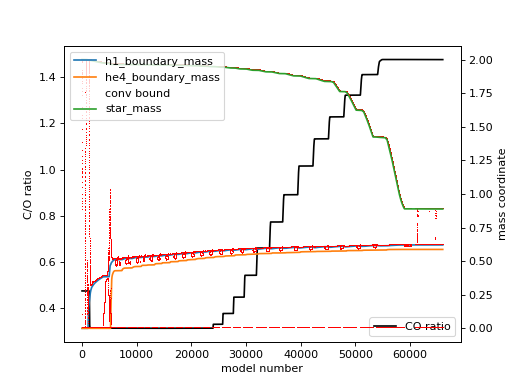

In [41]:
ifig=1;figure(ifig)
s.kippenhahn_CO(ifig,'model')

What's happening at the centre of the star? ...

<IPython.core.display.Javascript object>


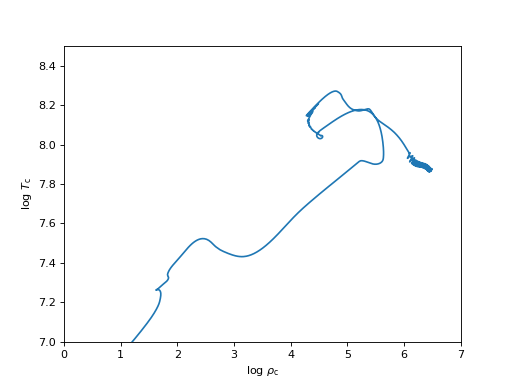

[0, 7, 7, 8.5]

In [43]:
ifig=2;figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])

... and at the surface?

<IPython.core.display.Javascript object>


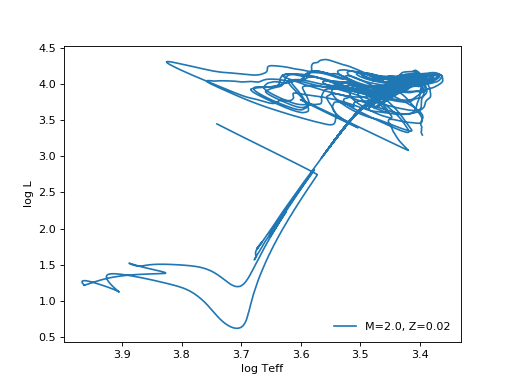

In [44]:
ifig=3;figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

<IPython.core.display.Javascript object>


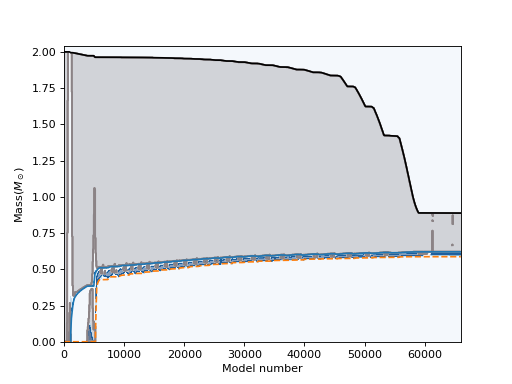

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [49]:
ifig=4;figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 2 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [46]:
pt=mp.se(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


### Abundance profiles 

#### A number of isotopes in the H shell 
In the stellar evolution analysis we found that a H-burning shell inbetween thermal pulses could be found at cycle 18000. Let's plot a few isotopes that are being created or destroyed in this H-burning shell:

and the nuclides that are being created or destroyed in this part of the star:

<IPython.core.display.Javascript object>


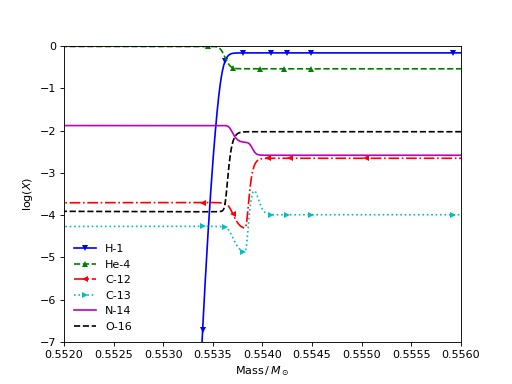

 reading ['iso_massf']...100%

(0.552, 0.556)

In [48]:
species=['H-1','He-4','C-12','C-13','N-14','O-16']
ifig=5;figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=18000, logy=True)
ylim(-7,0)
xlim(0.552,0.556)

#### Abundance profile at the time of formation of the partial-mix zone

In [30]:
species=['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

<IPython.core.display.Javascript object>


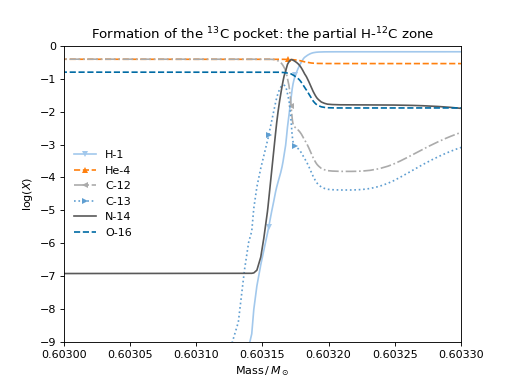

 reading ['iso_massf']...100%

In [50]:
ifig=6;figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=45500, logy=True, colourblind=True)
ylim(-9,0)
xlim(0.603,0.6033)
title("Formation of the $^\mathsf{13}\mathsf{C}$ pocket: the partial H-$^\mathsf{12}\mathsf{C}$ zone")

<IPython.core.display.Javascript object>


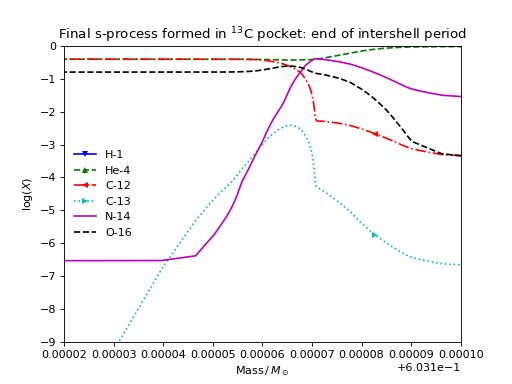

 reading ['iso_massf']...100%

In [51]:
ifig=7;figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=47220, logy=True, colourblind=False)
ylim(-9,0)
xlim(0.60312,0.6032)
title("Final s-process formed in $^\mathsf{13}\mathsf{C}$ pocket: end of intershell period")

### Isotopic abundance distribution in the C13 pocket

#### Static plots



In [54]:
pt.iso_abund?

<IPython.core.display.Javascript object>


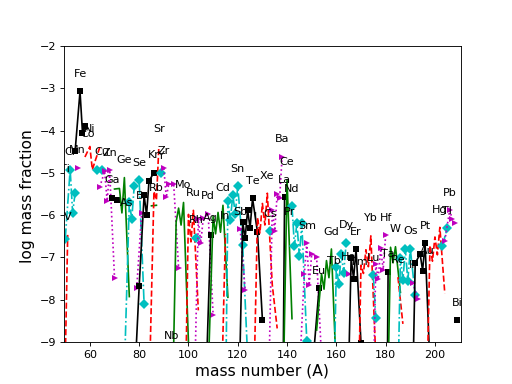

 reading ['mass']...100%Using the following conditions:
	mass_range: 0.60312 0.6032
	Atomic mass_range: 50 210
	cycle:            0000047220
	plot only stable: True
	plot decayed:     False


In [59]:
ifig=8;figure(ifig)
pt.iso_abund(47220, stable=True,amass_range=[50,210], mass_range=[0.60312,0.6032], ylim=[-9, -2])

### Abundance chart plot
We can also see the impact on the isotopic abundance chart for that part of the star:

In [57]:
pt.abu_chart?

<IPython.core.display.Javascript object>


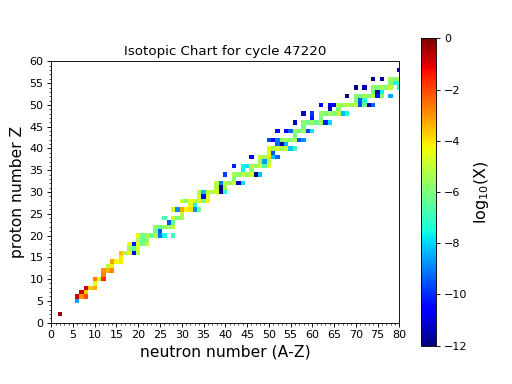

 reading ['mass']...100%.100%

In [63]:
ifig=47220;figure(ifig)
pt.abu_chart(47220,mass_range=[0.60312,0.6032], plotaxis=[0, 80, 0, 60],\
             ilabel=False,imlabel=False,boxstable=False)


 reading ['iso_massf', 'mass']...100%

<IPython.core.display.Javascript object>


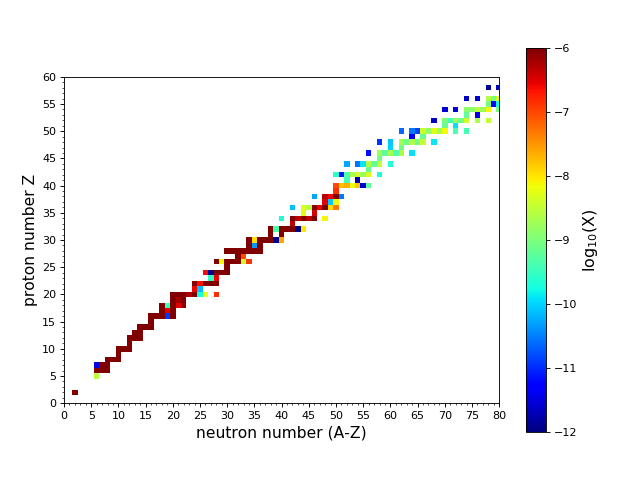

In [61]:
pt.movie(cycs,plotstyle='abu_chart',
                mass_range=[0.5768,0.5769],plotaxis=[0, 80, 0, 60],
                ilabel=False,imlabel=False,boxstable=False)

You can extract the trajectory and initial abundances from this model at the key mass coordinate for use in a 1-zone PPN simulation in order to study, for example, the impact of a new rate

In [62]:
pt.abund_at_masscoordinate(26100,0.57685,online=True)

 reading ['rho']...100%iso_massf
 reading ['iso_massf']...100%

/home/user/WENDI/notebooks/StellarDataSets/massf_0.57685.dat